In [1]:
import pandas as pd
import cx_Oracle
pd.set_option('display.max_columns', None)

In [2]:
ip = '172.16.80.74'
port = '1521'
SID = 'RPTDB'

dsn_tns = cx_Oracle.makedsn(ip, port, SID)
connection = cx_Oracle.connect('ANLYUSR', 'ANLYUSR$', dsn_tns)

In [14]:
query = "SELECT \
tb1.PROPNO,tb1.AGMTNO,tb1.DEALER_CODE,tb1.PORTFOLIO, \
tb6.PREPAIDPOSTPAIDFLAG, tb6.AVGMOBILEBILLAMOUNTLAST3MON, tb6.AVGMOBRECHARGEAMOUNTLAST3MON, \
tb4.INSTALLTIME,tb4.LASTPINGTIME,tb4.REQUESTTIME, \
tb1.DEALER_TYPE, \
tb1.PRODUCT_CODE, \
tb1.MODEL_CODE, \
tb1.SCHEME_TYPE, \
tb1.LTV, \
tb1.STATE, \
tb1.IMEI_NUMBER, \
tb7.MAKE_CODE, \
tb7.MODEL_DESC, \
tb2.CITY as DEALER_CITY, \
tb1.REGISTRATION_TYPE, \
tb1.SCHEME_CODE, \
tb1.CIBIL_HIT,tb1.SURROGATE, \
tb1.ACTUAL_LOAN_AMOUNT, \
tb1.CITY, \
tb5.LATESTBALANCE, \
tb1.GENDER, \
tb1.QUALIFICATION, \
tb1.AGE, \
tb1.CIBIL_SCORE, \
tb1.EXISTING_CUSTOMER, \
tb1.SPL_INSURANCE_TYPE, \
tb1.ADDRESS_TYPE,tb1.RESIDENT_TYPE, \
tb1.VOTERID,tb1.PANNO,tb1.DRIVING_LICENSE,tb1.PASSPORT,tb1.AADHAR,tb1.RATION, \
tb3.ACTIVITY_CODE, \
tb3.TAT_HOUR, \
tb3.TAT_DAYS,tb3.TAT_DAYS_EXCLUDE_SUNDAY, \
tb1.PAYMENT_TYPE, \
tb1.IFSC_CODE, \
tb1.ELIGIBILITYGRID \
FROM \
BIUSR.TBL_TRN_CUSTOMER_DETAILS tb1 \
INNER JOIN \
BIUSR.TBL_MST_DEALER tb2 \
ON tb1.DEALER_CODE = tb2.DEALER_CODE \
AND tb1.PORTFOLIO = 'CD' \
AND tb2.PORTFOLIO = 'CD' \
INNER JOIN \
BIUSR.TVS_TRAN_ACTIVITY tb3 \
ON tb1.PROPNO = tb3.PROPNO \
AND tb3.PORTFOLIO = 'CD' \
AND tb3.ACTIVITY_CODE = 'DISBURSAL_TAT' \
INNER JOIN \
BIUSR.TBL_TRN_CV_METADATA tb4 \
ON tb1.PROPNO = tb4.PROPNO \
AND SUBSTR(tb4.PROPNO,5,2) = 'CD' \
INNER JOIN \
BIUSR.TBL_TRN_CV_ACCOUNTS tb5 \
ON tb1.PROPNO = tb5.PROPNO \
AND SUBSTR(tb5.PROPNO,5,2) = 'CD' \
INNER JOIN \
BIUSR.TBL_TRN_CV_UTILITYACCOUNT tb6 \
ON tb1.PROPNO = tb6.PROPNO \
AND SUBSTR(tb6.PROPNO,5,2) = 'CD' \
INNER JOIN \
BIUSR.TBL_MST_MODEL tb7 \
ON tb1.MODEL_CODE = tb7.MODEL_CODE \
AND tb7.PORTFOLIO = 'CD'"

In [15]:
Data = pd.read_sql(query, con=connection, chunksize=40000)

In [16]:
data = pd.concat([chunk for chunk in Data])

In [33]:
data.head()

,PROPNO,AGMTNO,DEALER_CODE,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,LATESTBALANCE,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,Business_portfolio
6435,3054CD0057236,WB3054CD0057236,CD04818,0,0,0,2018-09-19T12:06:34.509Z,2018-09-19T19:02:26.634Z,2018-09-19T19:20:27.871Z,DEALER,MOBILE,CD00124531,CDSPL,70.00,WB,359053099542454,MOBILE,Samsung Mobile SM-J810GZKGINS,DT1217,None,CD_M_0245,Y,None,12593.0,Kolkata,None,MALE,None,39.0,749.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.22,0.01,0,ACH,UCBA0001760,69CIB_>700 BL/OTH NORMS MET,CD
6438,3078CD0049127,WB3078CD0049127,CD00458,0,0,0,2018-08-29T13:27:14.850Z,2018-09-05T17:36:11.864Z,2018-09-05T20:52:21.768Z,DEALER,FRIDGE,CD00124877,CDOEM,66.67,WB,None,GODREJ,GODREJ REF 52141501SD01439,DT1223,None,CD_M_0308,Y,None,10332.0,Murshidabad,None,FEMALE,None,24.0,-1.0,None,L,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.23,0.01,0.01,ACH,UTBI0AMMC33,44HM_Non EMI Loan CHK,CD
6441,3078CD0049129,WB3078CD0049129,CD07425,None,NaN,NaN,None,None,None,DEALER,TV,CD0003515,CDOEM,66.65,WB,None,TV,SAMSUNG TV UA24H4003ARLXL,Cooch Behar,None,CD_M_0034,Y,Banking,8664.0,Cooch Behar,None,MALE,None,42.0,725.0,None,D,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.16,0.01,0.01,ACH,SBIN0007294,nullNo eligibility criteria matched,CD
14267,3009CD0000008,KA3009CD0000008,CD01229,None,NaN,NaN,None,None,None,DEALER,TV,CD0001734,CDOEM,77.77,KA,None,TV,LG TV 43LJ554T,DT1130,None,CD_M_0056,Y,None,35776.0,Bangalore Rural,NaN,MALE,None,34.0,762.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0,0,0,ACH,SBIN0003024,12AL 5-6L norms met,CD
14270,3029CD0000008,MH3029CD0000008,CD01627,None,NaN,NaN,None,None,None,DEALER,FRIDGE,CD0005199,CDOEM,90.00,MH,None,REF,SAMSUNG REF RT28M3743UT/HL,DT1008,None,CD_M_0020,Y,None,22843.0,Osmanabad,NaN,MALE,None,23.0,726.0,None,None,RS,OWNED,N,Y,N,N,Y,N,DISBURSAL_TAT,21.49,0.9,0.9,ECS,HDFC0000360,1PL <5L-720+ norms met,CD


In [29]:
data['Business_portfolio'] = data.apply(lambda x: x['PROPNO'][4:6], axis=1)

In [31]:
data = data.loc[data['Business_portfolio'] == 'CD']

In [48]:
data_v2 = data

In [49]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728934 entries, 6435 to 34381
Data columns (total 48 columns):
PROPNO                          728934 non-null object
AGMTNO                          728911 non-null object
DEALER_CODE                     728934 non-null object
PREPAIDPOSTPAIDFLAG             392553 non-null object
AVGMOBILEBILLAMOUNTLAST3MON     392553 non-null object
AVGMOBRECHARGEAMOUNTLAST3MON    392553 non-null object
INSTALLTIME                     392565 non-null object
LASTPINGTIME                    392565 non-null object
REQUESTTIME                     392565 non-null object
DEALER_TYPE                     728934 non-null object
PRODUCT_CODE                    728934 non-null object
MODEL_CODE                      728934 non-null object
SCHEME_TYPE                     728934 non-null object
LTV                             728934 non-null float64
STATE                           728913 non-null object
IMEI_NUMBER                     338981 non-null object
MAKE_C

In [50]:
data_v2['LATESTBALANCE'] = data_v2.apply(lambda x: 0 if x['LATESTBALANCE'] == 'None' else x['LATESTBALANCE'], axis = 1)

In [52]:
data_v2['LATESTBALANCE'] = data_v2.apply(lambda x: 0 if x['LATESTBALANCE'] < 0 else x['LATESTBALANCE'], axis = 1)

In [81]:
LastBalance = data_v2[['PROPNO','LATESTBALANCE']].groupby(['PROPNO']).sum().reset_index()

In [82]:
data_v2 = pd.merge(data_v2, LastBalance, on='PROPNO', how='left')

In [84]:
data_v2.rename(columns={'LATESTBALANCE_y':'LATESTBALANCE_NEW'}, inplace=True)

In [88]:
data_v2 = data_v2.drop(['LATESTBALANCE_x'], axis=1)

In [92]:
data_v2 = data_v2.drop_duplicates()

In [108]:
data_v2['PROPNO'].count()

628759

In [93]:
mandate = pd.read_excel("D:\CD\Mandate_not_registered.xlsx")

In [94]:
mandate['IS_MANDATE_REGISTERED'] = 0

In [95]:
mandate.head()

,AGMTNO,IS_MANDATE_REGISTERED
0,AP3019CD0000058,0
1,AP3019CD0000258,0
2,AP3019CD0000289,0
3,AP3019CD0000353,0
4,AP3019CD0000364,0


In [96]:
final_data = pd.merge(data_v2, mandate, on='AGMTNO', how='left')

In [117]:
final_data.head()

,PROPNO,AGMTNO,DEALER_CODE,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,Business_portfolio,LATESTBALANCE_NEW,IS_MANDATE_REGISTERED
0,3054CD0057236,WB3054CD0057236,CD04818,0,0,0,2018-09-19T12:06:34.509Z,2018-09-19T19:02:26.634Z,2018-09-19T19:20:27.871Z,DEALER,MOBILE,CD00124531,CDSPL,70.00,WB,359053099542454,MOBILE,Samsung Mobile SM-J810GZKGINS,DT1217,None,CD_M_0245,Y,None,12593.0,Kolkata,MALE,None,39.0,749.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.22,0.01,0,ACH,UCBA0001760,69CIB_>700 BL/OTH NORMS MET,CD,0.0,1.0
1,3078CD0049127,WB3078CD0049127,CD00458,0,0,0,2018-08-29T13:27:14.850Z,2018-09-05T17:36:11.864Z,2018-09-05T20:52:21.768Z,DEALER,FRIDGE,CD00124877,CDOEM,66.67,WB,None,GODREJ,GODREJ REF 52141501SD01439,DT1223,None,CD_M_0308,Y,None,10332.0,Murshidabad,FEMALE,None,24.0,-1.0,None,L,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.23,0.01,0.01,ACH,UTBI0AMMC33,44HM_Non EMI Loan CHK,CD,0.0,0.0
2,3078CD0049129,WB3078CD0049129,CD07425,None,NaN,NaN,None,None,None,DEALER,TV,CD0003515,CDOEM,66.65,WB,None,TV,SAMSUNG TV UA24H4003ARLXL,Cooch Behar,None,CD_M_0034,Y,Banking,8664.0,Cooch Behar,MALE,None,42.0,725.0,None,D,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.16,0.01,0.01,ACH,SBIN0007294,nullNo eligibility criteria matched,CD,0.0,1.0
3,3009CD0000008,KA3009CD0000008,CD01229,None,NaN,NaN,None,None,None,DEALER,TV,CD0001734,CDOEM,77.77,KA,None,TV,LG TV 43LJ554T,DT1130,None,CD_M_0056,Y,None,35776.0,Bangalore Rural,MALE,None,34.0,762.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0,0,0,ACH,SBIN0003024,12AL 5-6L norms met,CD,0.0,1.0
4,3029CD0000008,MH3029CD0000008,CD01627,None,NaN,NaN,None,None,None,DEALER,FRIDGE,CD0005199,CDOEM,90.00,MH,None,REF,SAMSUNG REF RT28M3743UT/HL,DT1008,None,CD_M_0020,Y,None,22843.0,Osmanabad,MALE,None,23.0,726.0,None,None,RS,OWNED,N,Y,N,N,Y,N,DISBURSAL_TAT,21.49,0.9,0.9,ECS,HDFC0000360,1PL <5L-720+ norms met,CD,0.0,1.0


In [109]:
final_data['PROPNO'].count()

628759

In [98]:
final_data['IS_MANDATE_REGISTERED'] = final_data['IS_MANDATE_REGISTERED'].fillna(value=1)

In [99]:
final_data[['IS_MANDATE_REGISTERED']].groupby(['IS_MANDATE_REGISTERED'])['IS_MANDATE_REGISTERED'].agg(['sum','count'])

,sum,count
IS_MANDATE_REGISTERED,,
0.0,0.0,59334
1.0,569425.0,569425


In [110]:
dealer_cat = pd.read_excel("D:\CD\CD_Dealer_code.xlsx")

In [111]:
dealer_cat.columns = ['DEALER_CODE', 'DELAER_NAME', 'DELAER_CATEGORY']

In [112]:
dealer_cat.head()

,DEALER_CODE,DELAER_NAME,DELAER_CATEGORY
0,CD10138,AKSHAYA COMMUNICATIONS THE MOBILE STORE,DS
1,CD08298,AMBIKA CELL POINT,DS
2,CD14314,APEX ELECTRONIC COMMUNICATION,DS
3,CD08352,APHONE ZONE,DS
4,CD14585,AYYAPPA AGENCIES,DS


In [113]:
final_data_v2 = pd.merge(final_data, dealer_cat, on='DEALER_CODE', how='left')

In [115]:
final_data_v2['PROPNO'].count()

628903

In [116]:
final_data_v2['IS_MOBILE'] = final_data_v2.apply(lambda x: 1 if x['PRODUCT_CODE'] == 'MOBILE' else 0, axis=1)

In [134]:
final_data_v2.head()

,PROPNO,AGMTNO,DEALER_CODE,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,Business_portfolio,LATESTBALANCE_NEW,IS_MANDATE_REGISTERED,DELAER_NAME,DELAER_CATEGORY,IS_MOBILE,Mobile_active_hours
0,3054CD0057236,WB3054CD0057236,CD04818,0,0,0,2018-09-19T12:06:34.509Z,2018-09-19T19:02:26.634Z,2018-09-19T19:20:27.871Z,DEALER,MOBILE,CD00124531,CDSPL,70.00,WB,359053099542454,MOBILE,Samsung Mobile SM-J810GZKGINS,DT1217,None,CD_M_0245,Y,None,12593.0,Kolkata,MALE,None,39.0,749.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.22,0.01,0,ACH,UCBA0001760,69CIB_>700 BL/OTH NORMS MET,CD,0.0,1.0,AL HABIB MOBILE STORES,DS,1,7.0
1,3078CD0049127,WB3078CD0049127,CD00458,0,0,0,2018-08-29T13:27:14.850Z,2018-09-05T17:36:11.864Z,2018-09-05T20:52:21.768Z,DEALER,FRIDGE,CD00124877,CDOEM,66.67,WB,None,GODREJ,GODREJ REF 52141501SD01439,DT1223,None,CD_M_0308,Y,None,10332.0,Murshidabad,FEMALE,None,24.0,-1.0,None,L,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.23,0.01,0.01,ACH,UTBI0AMMC33,44HM_Non EMI Loan CHK,CD,0.0,0.0,SUR SANGAM,DD,0,172.0
2,3078CD0049129,WB3078CD0049129,CD07425,None,NaN,NaN,None,None,None,DEALER,TV,CD0003515,CDOEM,66.65,WB,None,TV,SAMSUNG TV UA24H4003ARLXL,Cooch Behar,None,CD_M_0034,Y,Banking,8664.0,Cooch Behar,MALE,None,42.0,725.0,None,D,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.16,0.01,0.01,ACH,SBIN0007294,nullNo eligibility criteria matched,CD,0.0,1.0,MODAK STORE,DS,0,NaN
3,3009CD0000008,KA3009CD0000008,CD01229,None,NaN,NaN,None,None,None,DEALER,TV,CD0001734,CDOEM,77.77,KA,None,TV,LG TV 43LJ554T,DT1130,None,CD_M_0056,Y,None,35776.0,Bangalore Rural,MALE,None,34.0,762.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0,0,0,ACH,SBIN0003024,12AL 5-6L norms met,CD,0.0,1.0,SRI SHARADHAMBA ENTERPRISES,DS,0,NaN
4,3029CD0000008,MH3029CD0000008,CD01627,None,NaN,NaN,None,None,None,DEALER,FRIDGE,CD0005199,CDOEM,90.00,MH,None,REF,SAMSUNG REF RT28M3743UT/HL,DT1008,None,CD_M_0020,Y,None,22843.0,Osmanabad,MALE,None,23.0,726.0,None,None,RS,OWNED,N,Y,N,N,Y,N,DISBURSAL_TAT,21.49,0.9,0.9,ECS,HDFC0000360,1PL <5L-720+ norms met,CD,0.0,1.0,BALAJI ENTERPRISES,DS,0,NaN


In [125]:
import dateutil.parser
startdate = dateutil.parser.parse(final_data_v2['INSTALLTIME'][1])
enddate = dateutil.parser.parse(final_data_v2['LASTPINGTIME'][1])

In [130]:
diff = enddate - startdate

In [131]:
diff.total_seconds() / 3600

172.14917055555554

In [132]:
import numpy as np
def how_long(row):
    try:
        startdate = dateutil.parser.parse(row['INSTALLTIME'])
        enddate = dateutil.parser.parse(row['LASTPINGTIME'])
        diff = enddate - startdate
        return np.around(diff.total_seconds() / 3600)
    except:
        return None        

In [133]:
final_data_v2['Mobile_active_hours'] = final_data_v2.apply(how_long, axis=1)

In [210]:
final_data_v2.head()

,PROPNO,AGMTNO,DEALER_CODE,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,Business_portfolio,LATESTBALANCE_NEW,IS_MANDATE_REGISTERED,DELAER_NAME,DELAER_CATEGORY,IS_MOBILE,Mobile_active_hours,Mobile_Bill,Mobile_Bill_bin,IS_CIBIL_HIT,SURROGATE_CAT,TICKET_SIZE
0,3054CD0057236,WB3054CD0057236,CD04818,0,0.0,0.0,2018-09-19T12:06:34.509Z,2018-09-19T19:02:26.634Z,2018-09-19T19:20:27.871Z,DEALER,MOBILE,CD00124531,CDSPL,70.00,WB,359053099542454,MOBILE,Samsung Mobile SM-J810GZKGINS,DT1217,None,CD_M_0245,Y,None,12593.0,Kolkata,MALE,None,39.0,749.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.22,0.01,0,ACH,UCBA0001760,69CIB_>700 BL/OTH NORMS MET,CD,0.0,1.0,AL HABIB MOBILE STORES,DS,1,7.0,0.0,0,1,0,5
1,3078CD0049127,WB3078CD0049127,CD00458,0,0.0,0.0,2018-08-29T13:27:14.850Z,2018-09-05T17:36:11.864Z,2018-09-05T20:52:21.768Z,DEALER,FRIDGE,CD00124877,CDOEM,66.67,WB,None,GODREJ,GODREJ REF 52141501SD01439,DT1223,None,CD_M_0308,Y,None,10332.0,Murshidabad,FEMALE,None,24.0,-1.0,None,L,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.23,0.01,0.01,ACH,UTBI0AMMC33,44HM_Non EMI Loan CHK,CD,0.0,0.0,SUR SANGAM,DD,0,172.0,0.0,0,1,0,3
2,3078CD0049129,WB3078CD0049129,CD07425,0,0.0,0.0,None,None,None,DEALER,TV,CD0003515,CDOEM,66.65,WB,None,TV,SAMSUNG TV UA24H4003ARLXL,Cooch Behar,None,CD_M_0034,Y,Banking,8664.0,Cooch Behar,MALE,None,42.0,725.0,None,D,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0.16,0.01,0.01,ACH,SBIN0007294,nullNo eligibility criteria matched,CD,0.0,1.0,MODAK STORE,DS,0,NaN,0.0,0,1,1,1
3,3009CD0000008,KA3009CD0000008,CD01229,0,0.0,0.0,None,None,None,DEALER,TV,CD0001734,CDOEM,77.77,KA,None,TV,LG TV 43LJ554T,DT1130,None,CD_M_0056,Y,None,35776.0,Bangalore Rural,MALE,None,34.0,762.0,None,None,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,0,0.00,0,ACH,SBIN0003024,12AL 5-6L norms met,CD,0.0,1.0,SRI SHARADHAMBA ENTERPRISES,DS,0,NaN,0.0,0,1,0,10
4,3029CD0000008,MH3029CD0000008,CD01627,0,0.0,0.0,None,None,None,DEALER,FRIDGE,CD0005199,CDOEM,90.00,MH,None,REF,SAMSUNG REF RT28M3743UT/HL,DT1008,None,CD_M_0020,Y,None,22843.0,Osmanabad,MALE,None,23.0,726.0,None,None,RS,OWNED,N,Y,N,N,Y,N,DISBURSAL_TAT,21.49,0.90,0.9,ECS,HDFC0000360,1PL <5L-720+ norms met,CD,0.0,1.0,BALAJI ENTERPRISES,DS,0,NaN,0.0,0,1,0,9


In [140]:
final_data_v2['PREPAIDPOSTPAIDFLAG'].unique()

array(['0', None, 'Postpaid', 'prepaid', 'Prepaid', 'Both', 'postpaid',
       'null', 'prepaid and postpaid'], dtype=object)

In [142]:
def mark_post_prepaid(row):
    if row['PREPAIDPOSTPAIDFLAG'] in ['prepaid', 'Prepaid']:
        return 1
    elif row['PREPAIDPOSTPAIDFLAG'] in ['Both', 'postpaid', 'prepaid and postpaid', 'Postpaid']:
        return 2
    else:
        return 0

In [143]:
final_data_v2['PREPAIDPOSTPAIDFLAG'] = final_data_v2.apply(mark_post_prepaid, axis = 1)

In [151]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'] = final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].fillna(value=0)

In [158]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'] = final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].fillna(value=0)

In [160]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].isnull().sum()

0

In [152]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].isnull().sum() #334024

0

In [153]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].describe()

count    628903.000000
mean          1.510391
std         151.623483
min        -191.160000
25%           0.000000
50%           0.000000
75%           0.000000
max      103279.440000
Name: AVGMOBILEBILLAMOUNTLAST3MON, dtype: float64

In [161]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].describe()

count    628903.000000
mean          2.815827
std          40.231900
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        6584.000000
Name: AVGMOBRECHARGEAMOUNTLAST3MON, dtype: float64

In [155]:
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)
%matplotlib inline

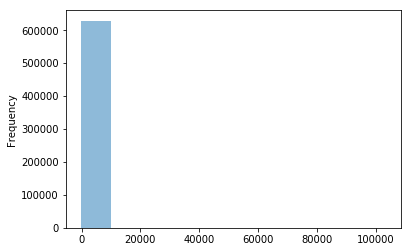

In [156]:
final_data_v2['AVGMOBILEBILLAMOUNTLAST3MON'].plot.hist(bins=10, alpha=0.5)

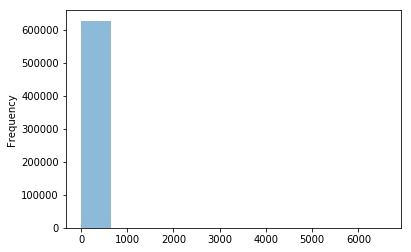

In [162]:
final_data_v2['AVGMOBRECHARGEAMOUNTLAST3MON'].plot.hist(bins=10, alpha=0.5)

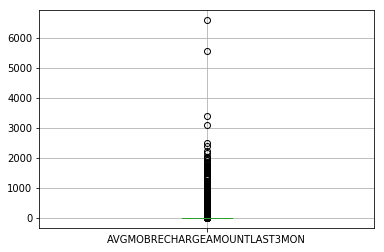

In [163]:
final_data_v2.boxplot(column=['AVGMOBRECHARGEAMOUNTLAST3MON'])

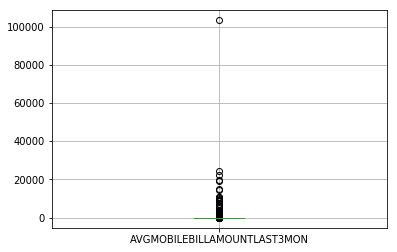

In [157]:
final_data_v2.boxplot(column=['AVGMOBILEBILLAMOUNTLAST3MON'])

In [180]:
def mobilebill(row):
    if row['PREPAIDPOSTPAIDFLAG'] == 0:
        return 0.0
    elif row['PREPAIDPOSTPAIDFLAG'] == 1:
        return float(str(row['AVGMOBRECHARGEAMOUNTLAST3MON']))
    elif row['PREPAIDPOSTPAIDFLAG'] == 2:
        if row['AVGMOBILEBILLAMOUNTLAST3MON'] != 0:
            return float(str(row['AVGMOBILEBILLAMOUNTLAST3MON']))
        else:
            return float(str(row['AVGMOBRECHARGEAMOUNTLAST3MON']))
        
"""  
prepost = 0 then monthly bill 0
prepost = 1 
then monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON
prepost = 2 AND AVGMOBILEBILLAMOUNTLAST3MON = 0
then monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON
else 
then monthly bill = AVGMOBILEBILLAMOUNTLAST3MON
"""

'  \nprepost = 0 then monthly bill 0\nprepost = 1 \nthen monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON\nprepost = 2 AND AVGMOBILEBILLAMOUNTLAST3MON = 0\nthen monthly bill = AVGMOBRECHARGEAMOUNTLAST3MON\nelse \nthen monthly bill = AVGMOBILEBILLAMOUNTLAST3MON\n'

In [181]:
final_data_v2['Mobile_Bill'] = final_data_v2.apply(mobilebill, axis=1)

In [183]:
final_data_v2['Mobile_Bill'].describe()

count    628903.000000
mean          4.270038
std         156.760968
min        -191.160000
25%           0.000000
50%           0.000000
75%           0.000000
max      103279.440000
Name: Mobile_Bill, dtype: float64

In [184]:
def mobile_billbin(row):
    if row['Mobile_Bill'] > 0 and row['Mobile_Bill'] <= 50:
        return 1
    elif row['Mobile_Bill'] > 50 and row['Mobile_Bill'] <= 100:
        return 2
    elif row['Mobile_Bill'] > 100 and row['Mobile_Bill'] <= 150:
        return 3
    elif row['Mobile_Bill'] > 150 and row['Mobile_Bill'] <= 200:
        return 4
    elif row['Mobile_Bill'] > 200 and row['Mobile_Bill'] <= 250:
        return 5
    elif row['Mobile_Bill'] > 250 and row['Mobile_Bill'] <= 300:
        return 6
    elif row['Mobile_Bill'] > 300 and row['Mobile_Bill'] <= 350:
        return 7
    elif row['Mobile_Bill'] > 350 and row['Mobile_Bill'] <= 400:
        return 8
    elif row['Mobile_Bill'] > 400 and row['Mobile_Bill'] <= 450:
        return 9
    elif row['Mobile_Bill'] > 450 and row['Mobile_Bill'] <= 500:
        return 10
    elif row['Mobile_Bill'] > 500:
        return 11
    else:
        if row['Mobile_Bill'] < 0:
            return -1
        else:
            return 0

In [185]:
final_data_v2['Mobile_Bill_bin'] = final_data_v2.apply(mobile_billbin, axis=1)

In [187]:
final_data_v2.CIBIL_HIT.unique()

array(['Y', 'N'], dtype=object)

In [188]:
final_data_v2.SURROGATE.unique()

array([None, 'Banking', 'Debit/Credit Card', 'Own house proof', 'CIBIL',
       'Repayment', 'Income Proof', 'SAATHI', 'CRIF', 'Business Proof',
       'Car RC'], dtype=object)

In [189]:
final_data_v2.CIBIL_HIT.isnull().sum()

0

In [191]:
final_data_v2['IS_CIBIL_HIT'] = final_data_v2.apply(lambda x: 1 if x['CIBIL_HIT'] == 'Y' else 0, axis=1)

In [192]:
def is_surrogate(row):
    if row['SURROGATE'] == 'Banking':
        return 1
    elif row['SURROGATE'] == 'Debit/Credit Card':
        return 2
    elif row['SURROGATE'] == 'Own house proof':
        return 3
    elif row['SURROGATE'] == 'CIBIL':
        return 4
    elif row['SURROGATE'] == 'Repayment':
        return 5
    elif row['SURROGATE'] == 'Income Proof':
        return 6
    elif row['SURROGATE'] == 'SAATHI':
        return 7
    elif row['SURROGATE'] == 'CRIF':
        return 8
    elif row['SURROGATE'] == 'Business Proof':
        return 9
    elif row['SURROGATE'] == 'Car RC':
        return 10
    else:
        return 0
    

In [193]:
final_data_v2['SURROGATE_CAT'] = final_data_v2.apply(is_surrogate, axis=1)

In [190]:
final_data_v2.SURROGATE.isnull().sum()

350663

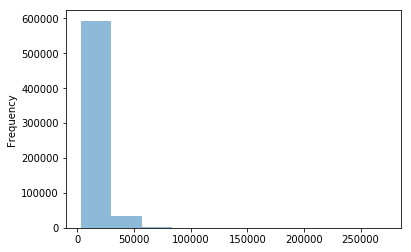

In [194]:
final_data_v2['ACTUAL_LOAN_AMOUNT'].plot.hist(bins=10, alpha=0.5)

In [195]:
final_data_v2['ACTUAL_LOAN_AMOUNT'].describe()

count    628903.000000
mean      15439.071878
std        7679.837477
min        3150.000000
25%       10416.000000
50%       13300.000000
75%       17990.000000
max      272000.000000
Name: ACTUAL_LOAN_AMOUNT, dtype: float64

In [197]:
tickets = np.percentile(final_data_v2['ACTUAL_LOAN_AMOUNT'], [10,20,30,40,50,60,70,80,90,100])

In [200]:
def ticketsize(row):
    if row['ACTUAL_LOAN_AMOUNT'] > 0 and row['ACTUAL_LOAN_AMOUNT'] <= tickets[0]:
        return 1
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[0] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[1]:
        return 2
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[1] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[2]:
        return 3
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[2] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[3]:
        return 4
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[3] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[4]:
        return 5
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[4] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[5]:
        return 6
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[5] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[6]:
        return 7
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[6] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[7]:
        return 8
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[7] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[8]:
        return 9
    elif row['ACTUAL_LOAN_AMOUNT'] > tickets[8] and row['ACTUAL_LOAN_AMOUNT'] <= tickets[9]:
        return 10

In [201]:
final_data_v2['TICKET_SIZE'] = final_data_v2.apply(ticketsize, axis=1)

In [205]:
final_data_v2['TAT_DAYS'] = final_data_v2['TAT_DAYS'].fillna(value=0)

In [206]:
final_data_v2['TAT_DAYS'].describe()

count    628903.000000
mean          1.120182
std          16.276278
min           0.000000
25%           0.000000
50%           0.010000
75%           0.010000
max         416.640000
Name: TAT_DAYS, dtype: float64

In [209]:
final_data_v2.loc[final_data_v2['TAT_DAYS'] == 416.640000]

,PROPNO,AGMTNO,DEALER_CODE,PREPAIDPOSTPAIDFLAG,AVGMOBILEBILLAMOUNTLAST3MON,AVGMOBRECHARGEAMOUNTLAST3MON,INSTALLTIME,LASTPINGTIME,REQUESTTIME,DEALER_TYPE,PRODUCT_CODE,MODEL_CODE,SCHEME_TYPE,LTV,STATE,IMEI_NUMBER,MAKE_CODE,MODEL_DESC,DEALER_CITY,REGISTRATION_TYPE,SCHEME_CODE,CIBIL_HIT,SURROGATE,ACTUAL_LOAN_AMOUNT,CITY,GENDER,QUALIFICATION,AGE,CIBIL_SCORE,EXISTING_CUSTOMER,SPL_INSURANCE_TYPE,ADDRESS_TYPE,RESIDENT_TYPE,VOTERID,PANNO,DRIVING_LICENSE,PASSPORT,AADHAR,RATION,ACTIVITY_CODE,TAT_HOUR,TAT_DAYS,TAT_DAYS_EXCLUDE_SUNDAY,PAYMENT_TYPE,IFSC_CODE,ELIGIBILITYGRID,Business_portfolio,LATESTBALANCE_NEW,IS_MANDATE_REGISTERED,DELAER_NAME,DELAER_CATEGORY,IS_MOBILE,Mobile_active_hours,Mobile_Bill,Mobile_Bill_bin,IS_CIBIL_HIT,SURROGATE_CAT,TICKET_SIZE
156419,3078CD0063873,WB3078CD0063873,CD03449,0,0.0,0.0,2018-10-04T15:38:16.775Z,2018-10-04T19:48:06.147Z,2018-10-04T19:52:35.597Z,DEALER,MOBILE,CD00124123,CDSPL,68.93,WB,357110091015681,MOBILE,Samsung MOBILE SM-J600GZKHINS,DT1234,None,CD_M_0245,Y,None,10150.0,Jalpaiguri,MALE,None,24.0,722.0,None,L,RS,OWNED,N,N,N,N,Y,N,DISBURSAL_TAT,9999.39,416.64,344.68,ACH,BDBL0001140,7CD/TW -700+ norms met,CD,0.0,1.0,STEP IN THE MOBILE SHOP,DS,1,4.0,0.0,0,1,0,3


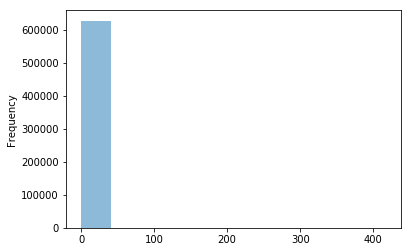

In [207]:
final_data_v2['TAT_DAYS'].plot.hist(bins=10, alpha=0.5)

In [213]:
final_data_v2['CROSS_SELL_INSURANCE'] = final_data_v2['SPL_INSURANCE_TYPE'].fillna(value=0)

In [216]:
final_data_v2['CROSS_SELL_INSURANCE'] = final_data_v2.apply(lambda x: 0 if x['CROSS_SELL_INSURANCE'] == 0 else 1, axis=1)

In [217]:
final_data_v2.to_csv("D:\CD_VARIABLES_Stage2_V5.csv", index=False)